# Cardiovascular Disease Risk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay

In [2]:
palette = sns.color_palette("icefire")
csvPath = "csv/cardio_train.csv"
# df has ; instead of , as separator
df = pd.read_csv(csvPath, sep=';')
df.drop('id', axis=1, inplace=True)

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Type de données
Données quantitatives discrètes:
- Age: âge en jours
- Gender: 1: femme, 2: homme
- Height: taille en cm
- Ap_hi: pression artérielle systolique
- Ap_lo: pression artérielle diastolique
- Cholesterol: 1: normal, 2: au-dessus de la normal, 3: bien au-dessus de la normal
- Glucose: 1: normal, 2: au-dessus de la normal, 3: bien au-dessus de la normal
- Smoke: 0: non-fumeur, 1: fumeur
- Alco: 0: ne boit pas, 1: boit
- Active: 0: pas d'activité physique, 1: activité physique
- Cardio: 0: pas de maladie cardiovasculaire, 1: maladie cardiovasculaire

Données quantitatives continues:
- Weight: poids en kg



In [6]:
age = df['age']
# age is in number of days, convert to years with 2 decimal places
age = age / 365.25

In [7]:
df['age_in_year'] = age
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.302850
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.754967
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.563313
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.361396
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.943874
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.390144
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656


## Néttoyage des données

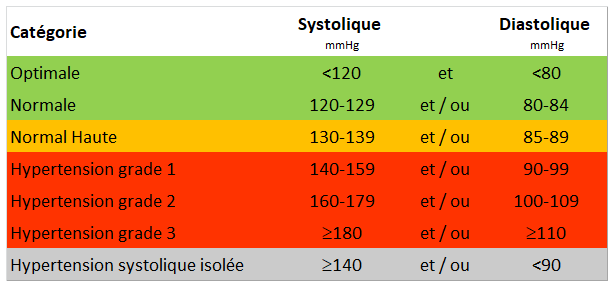

1) Valeurs seuilles pour les données aberrantes de la pression artérielle systolique et diastolique:   

(pression artérielle systolique pas de 20 -> -20 par rapport au minimun, +20 par rapport au maximum)
- systolique min = 100
- systolique max = 200

(pression artérielle diastolique pas de 10 -> -10 par rapport au minimun, +10 par rapport au maximum)
- diastolique min = 70
- diastolique max = 120

In [8]:
ap_hi_max = 200
ap_hi_min = 100
ap_lo_max = 120
ap_lo_min = 70

Suppression des valeurs aberrantes:

In [9]:
df = df[(df['ap_hi'] <= ap_hi_max) & (df['ap_hi'] >= ap_hi_min)]
df = df[(df['ap_lo'] <= ap_lo_max) & (df['ap_lo'] >= ap_lo_min)]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
count,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000,65336.000000
mean,19508.459042,1.353986,164.469190,74.479648,127.674161,82.273540,1.370607,1.228572,0.088389,0.053738,0.803447,0.506903,53.411250
std,2454.949600,0.478208,8.158041,14.290060,15.708979,8.272993,0.684612,0.575414,0.283862,0.225501,0.397395,0.499956,6.721286
min,10859.000000,1.000000,55.000000,11.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.730322
25%,17777.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.670773
50%,19724.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.001369
75%,21357.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.472279
max,23713.000000,2.000000,250.000000,200.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656


2) Valeurs seuilles pour les données aberrantes du poids et de la taille:
(poids d'un adulte 40 à 50 kg = sous-nutrition (choix de limite à 50 kg), 200 kg = obésité morbide (choix de limite à 200 kg) car l'obésité peut être un facteur de risque pour les maladies cardiovasculaires)
- poids min = 50
- poids max = 200

(taille d'un adulte 140 à 200 cm)
- taille min = 140
- taille max = 200

In [10]:
weight_min = 50
weight_max = 200
height_min = 140
height_max = 250

Suppression des valeurs aberrantes:

In [11]:
df = df[(df['weight'] <= weight_max) & (df['weight'] >= weight_min)]
df = df[(df['height'] <= height_max) & (df['height'] >= height_min)]

In [12]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
count,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000,64430.000000
mean,19512.441456,1.356946,164.681329,74.821320,127.764380,82.319044,1.371768,1.229319,0.088872,0.054105,0.803275,0.509204,53.422153
std,2452.051445,0.479102,7.746324,13.962157,15.693952,8.267473,0.685706,0.576227,0.284561,0.226227,0.397526,0.499919,6.713351
min,10859.000000,1.000000,140.000000,50.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.730322
25%,17828.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.810404
50%,19727.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.009582
75%,21357.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.472279
max,23713.000000,2.000000,250.000000,200.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656


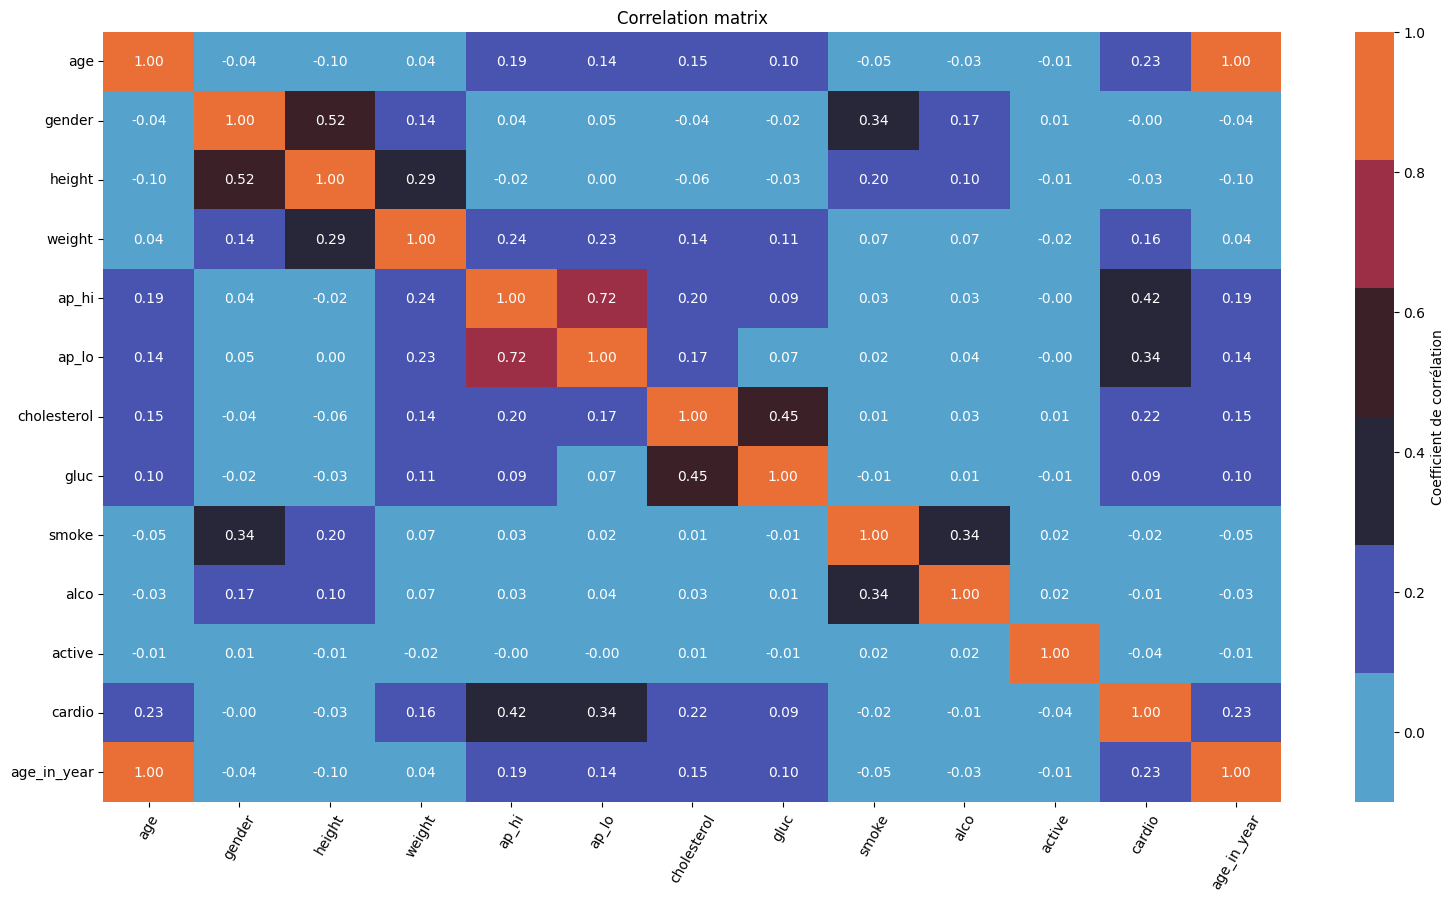

In [13]:
# heatmap
plt.figure(figsize=(19, 10))
plt.title('Correlation matrix')
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=palette, cbar_kws={'label': 'Coefficient de corrélation'})
plt.yticks(rotation=0)
plt.xticks(rotation=60)
plt.show()

Doublons de valeurs:

In [14]:
# Removes duplicated lines
df.drop_duplicates(inplace=True)

In [15]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
count,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000
mean,19512.549297,1.357032,164.681365,74.824623,127.767429,82.320063,1.371906,1.229404,0.088905,0.054125,0.803264,0.509285,53.422448
std,2452.178404,0.479128,7.747405,13.963481,15.696033,8.268755,0.685796,0.576317,0.284608,0.226267,0.397534,0.499918,6.713699
min,10859.000000,1.000000,140.000000,50.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.730322
25%,17831.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.820671
50%,19727.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.009582
75%,21357.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.472279
max,23713.000000,2.000000,250.000000,200.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656


## Affichage de l'age par tranche de 5 ans

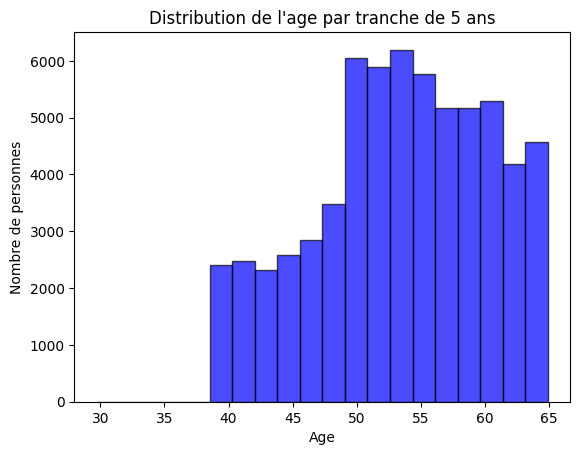

In [16]:
# affichage age par tranches de 5 ans
df['age_in_year'].hist(bins=20, color='blue', edgecolor='black', alpha=0.7, grid=False)
plt.title("Distribution de l'age par tranche de 5 ans")
plt.xlabel('Age')
plt.ylabel('Nombre de personnes')
plt.show()

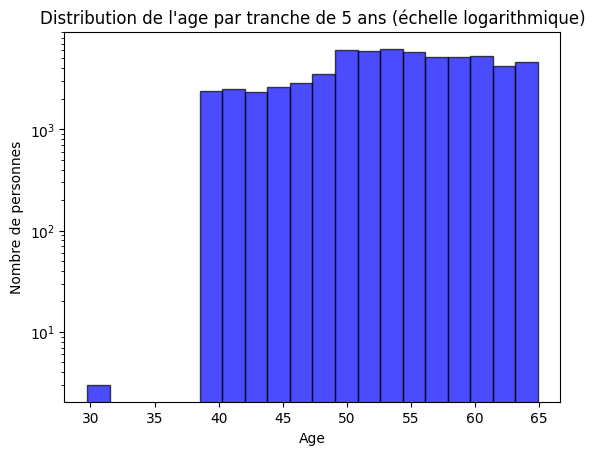

In [17]:

age = df['age_in_year']
age.hist(bins=20, log=True,color='blue', edgecolor='black', alpha=0.7, grid=False)
plt.title("Distribution de l'age par tranche de 5 ans (échelle logarithmique)")
plt.xlabel('Age')
plt.ylabel('Nombre de personnes')
plt.show()

In [18]:
# ajout d'une colone age en tranche de 5 ans
df['range_age'] = (df['age_in_year'] // 5) * 5
df['range_age'] = df['range_age'].astype(int)


In [19]:
# ajout d'une colone taille en tranche de 25 cm
df['range_height'] = (df['height'] // 25) * 25
df['range_height'] = df['range_height'].astype(int)

In [20]:
# ajout d'une colonne poids en tranche de 10 kg
df['range_weight'] = (df['weight'] // 10) * 10
df['range_weight'] = df['range_weight'].astype(int)

In [21]:
# ajout d'une colonne IMC
df['imc'] = df['weight'] / (df['height'] / 100) ** 2

In [22]:
# ajout d'une colonne IMC_observation 1 = maigre(<18.5), 2 = normal(18.5-24.9), 3 = surpoids(25-29.9), 4 = obèse(>30)
df['imc_observation'] = 0
df.loc[df['imc'] < 18.5, 'imc_observation'] = 1
df.loc[(df['imc'] >= 18.5) & (df['imc'] < 25), 'imc_observation'] = 2
df.loc[(df['imc'] >= 25) & (df['imc'] < 30), 'imc_observation'] = 3
df.loc[df['imc'] >= 30, 'imc_observation'] = 4

In [23]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year,range_age,range_height,range_weight,imc,imc_observation
count,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000,64406.000000
mean,19512.549297,1.357032,164.681365,74.824623,127.767429,82.320063,1.371906,1.229404,0.088905,0.054125,0.803264,0.509285,53.422448,50.849377,152.274245,70.604292,27.638837,2.901531
std,2452.178404,0.479128,7.747405,13.963481,15.696033,8.268755,0.685796,0.576317,0.284608,0.226267,0.397534,0.499918,6.713699,6.769131,8.582253,14.247189,5.131782,0.796716
min,10859.000000,1.000000,140.000000,50.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.730322,25.000000,125.000000,50.000000,13.760000,1.000000
25%,17831.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.820671,45.000000,150.000000,60.000000,23.938990,2.000000
50%,19727.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.009582,50.000000,150.000000,70.000000,26.533759,3.000000
75%,21357.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.472279,55.000000,150.000000,80.000000,30.407627,4.000000
max,23713.000000,2.000000,250.000000,200.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656,60.000000,250.000000,200.000000,68.308315,4.000000


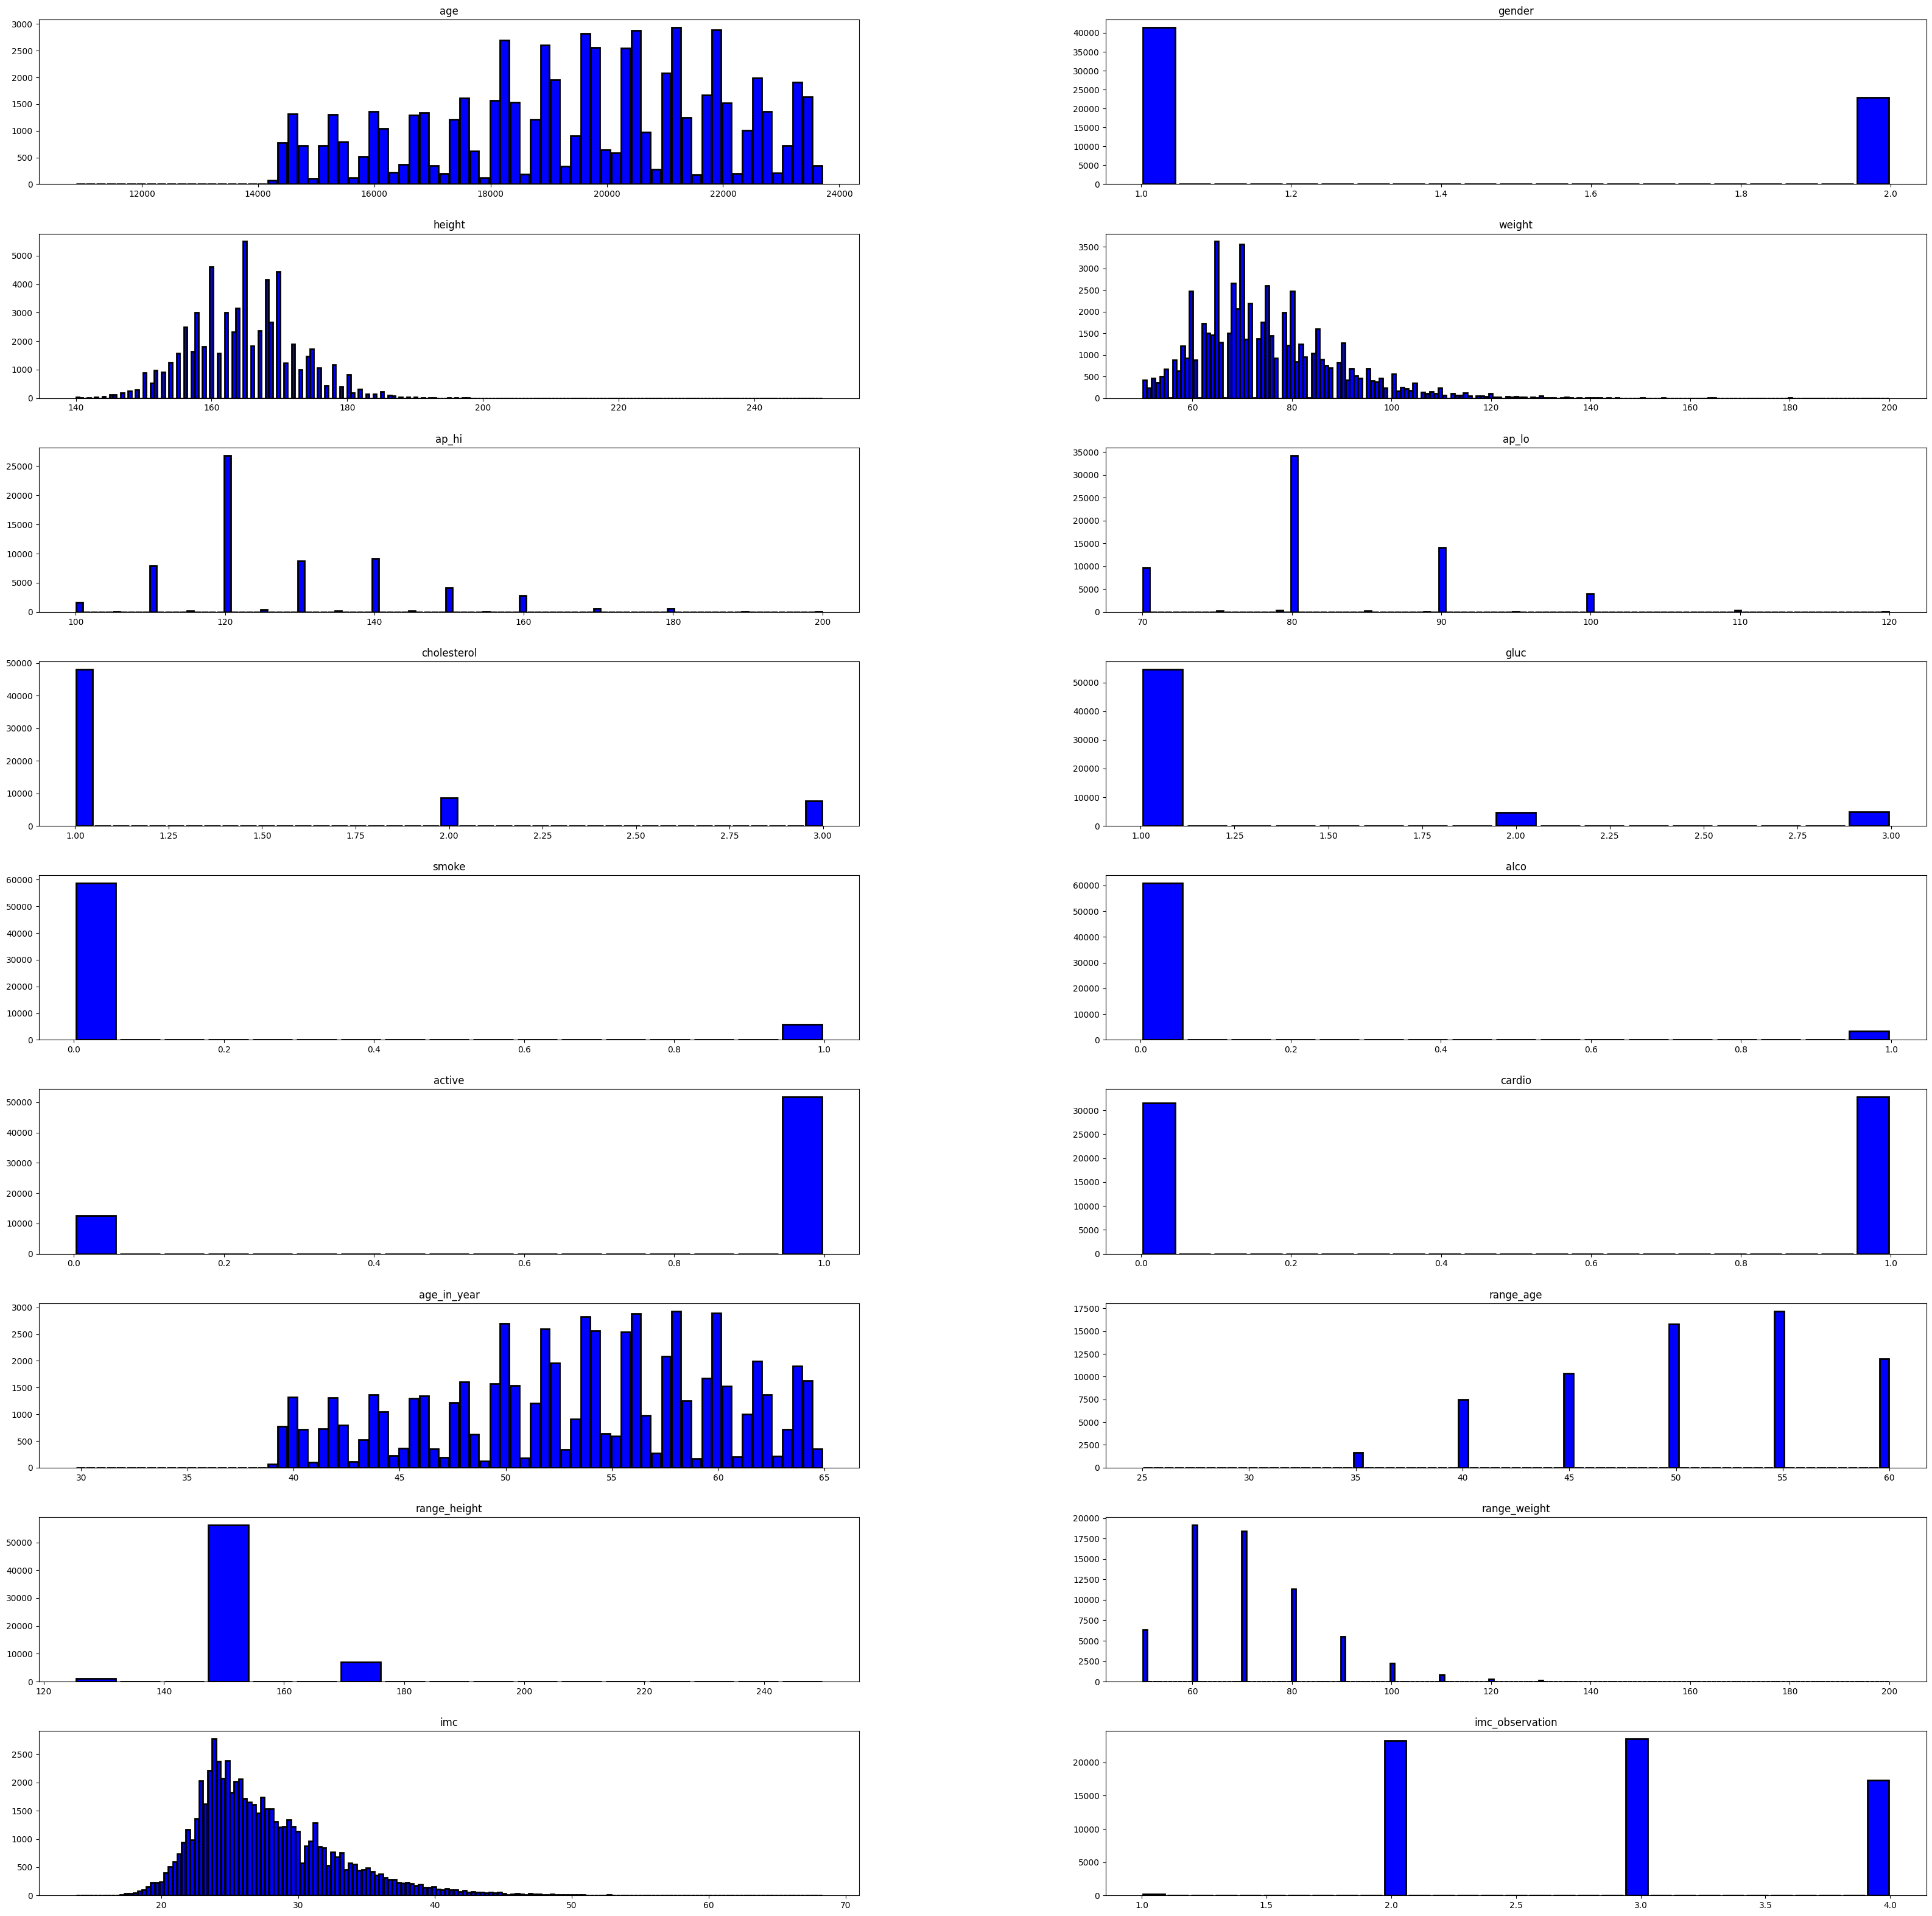

In [24]:
# histogrammes
df.hist(figsize=(40, 40), color='blue', bins='auto', grid=False, edgecolor='black', linewidth=2, zorder=2, layout=(9, 2), rwidth=0.9, histtype='bar', align='mid', orientation='vertical')
plt.show()

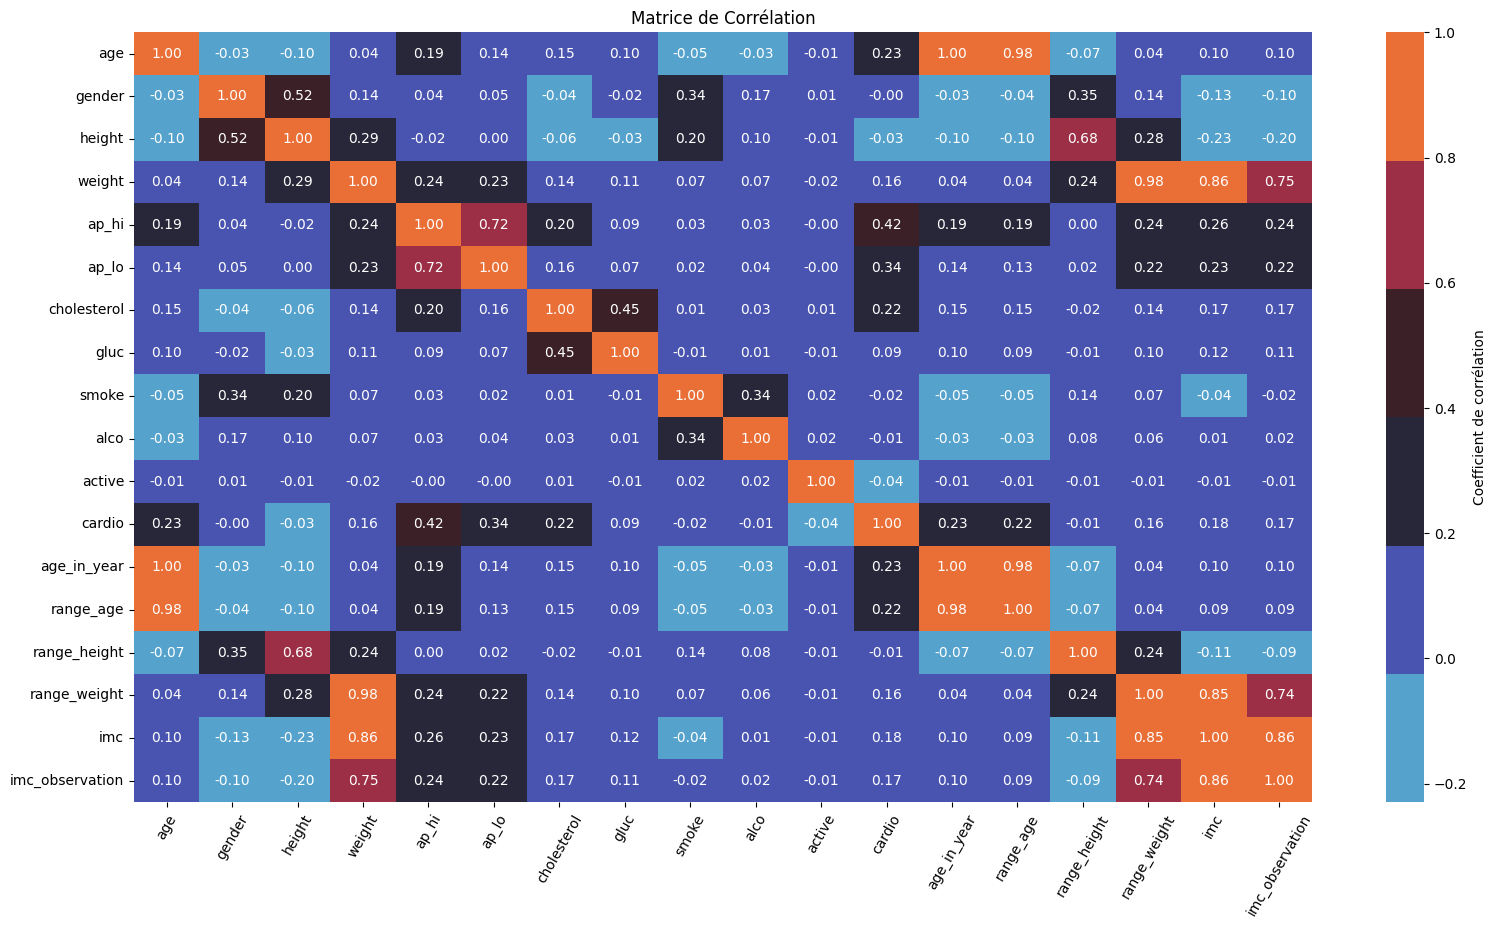

In [25]:
# heatmap
plt.figure(figsize=(19, 10))
plt.title('Matrice de Corrélation')
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=palette, cbar_kws={'label': 'Coefficient de corrélation'})
plt.yticks(rotation=0)
plt.xticks(rotation=60)
plt.show()

## Variables indépendantes et dépendante

Le risque de maladie cardiovasculaire est la variable dépendante. 
Les variables explicatives sont:
- la pression systolique (Ap_hi) - 42% de corrélation
- la pression diastolique (Ap_lo) - 34% de corrélation
- l'âge - 23% de corrélation
- le cholestérol - 22% de corrélation
- le poids - 16% de corrélation

## Regression Logistique avec SK-Learn

In [26]:
# Initialisation du modèle
model = linear_model.LogisticRegression(penalty=None, solver='sag', verbose=10, max_iter=1000)

# Séparation des données
X = df[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'weight']]
y = df['cardio']

In [27]:
# Definition des données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 
model.fit(X_train, y_train)

Epoch 1, change: 1.00000000
Epoch 2, change: 0.48586752
Epoch 3, change: 0.31742095
Epoch 4, change: 0.23667383
Epoch 5, change: 0.18543332
Epoch 6, change: 0.15103085
Epoch 7, change: 0.12530924
Epoch 8, change: 0.10726199
Epoch 9, change: 0.09349547
Epoch 10, change: 0.08265096
Epoch 11, change: 0.07359083
Epoch 12, change: 0.06620567
Epoch 13, change: 0.06000822
Epoch 14, change: 0.05467793
Epoch 15, change: 0.05024258
Epoch 16, change: 0.04634104
Epoch 17, change: 0.04291701
Epoch 18, change: 0.03986256
Epoch 19, change: 0.03717660
Epoch 20, change: 0.03480672
Epoch 21, change: 0.03268290
Epoch 22, change: 0.03075628
Epoch 23, change: 0.02902267
Epoch 24, change: 0.02745769
Epoch 25, change: 0.02602332
Epoch 26, change: 0.02471040
Epoch 27, change: 0.02351055
Epoch 28, change: 0.02240896
Epoch 29, change: 0.02139465
Epoch 30, change: 0.02045602
Epoch 31, change: 0.01958815
Epoch 32, change: 0.01878615
Epoch 33, change: 0.01803764
Epoch 34, change: 0.01734303
Epoch 35, change: 0.016

/home/geley/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s


LogisticRegression(max_iter=1000, penalty=None, solver='sag', verbose=10)

In [29]:
y_pred = model.predict(X_test)

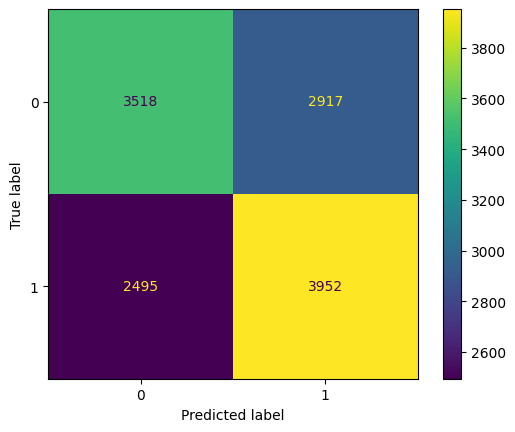

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
ConfusionMatrixDisplay(cm).plot()

### Matrice de Confusion


- <span style="color:green">Vrai Négatif (00): 3519</span>
- <span style="color:green">Vrai Positif (11): 3952</span>

- <span style="color:red">Faux Positif (01): 2916</span>
- <span style="color:red">Faux Négatif (10): 2495</span>

## Métriques de performance



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      6435
           1       0.58      0.61      0.59      6447

    accuracy                           0.58     12882
   macro avg       0.58      0.58      0.58     12882
weighted avg       0.58      0.58      0.58     12882



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


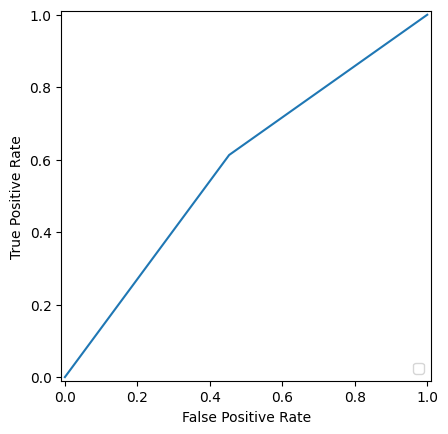

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()